# Model

In [4]:
#IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sklearn as sk
import pickle


import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [5]:
#To read the data
data = pd.read_csv('battles_data.csv')

In [6]:
#To split the data into 80% training and 20% testing
_80 = len(data)
80/100*_80


22437.600000000002

In [7]:
#Assigning and spliting the data 80/20
#For the y data, the first name has been selected randomly
trainx = data[:22438]
trainy = data['Name1_res'][:22438]

testx = data[22438:]
testy = data['Name1_res'][22438:]

train_draw = trainx['Draw']
test_draw  = testx['Draw']

In [8]:
#To prepare the data to be modelled, the irrelevent columns are dropped
trainx = trainx.drop(['Name1', 'Name2', 'Name1_res', 'Draw', 'Name2_res', 'Names_x', 'Names_y'], axis = 1)
testx = testx.drop(['Name1', 'Name2', 'Name1_res', 'Draw', 'Name2_res', 'Names_x', 'Names_y'], axis = 1)

In [ ]:
#The first attempt is to procede with a regression model

In [106]:
#A constant has been added but the model performs better without one
# trainx = sm.add_constant(trainx)
# testx = sm.add_constant(testx)

In [7]:
#To model the data
model = sm.OLS(trainy, trainx).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Name1_res   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                              4680.
Date:                Sat, 21 May 2022   Prob (F-statistic):                        0.00
Time:                        15:23:04   Log-Likelihood:                     -1.1191e+05
No. Observations:               22438   AIC:                                  2.238e+05
Df Residuals:                   22426   BIC:                                  2.239e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intelligence_x     0.4176      0.018     22.834      0.000       0.382       0.453
Strength_x         0.1288      0.018      7.013      0.000       0.093       0.165
Speed_x           -0.0256      0.018     -1.407      0.159      -0.061       0.010
Durability_x      -0.0816      0.026     -3.176      0.001      -0.132      -0.031
Power_x            0.6222      0.020     30.472      0.000       0.582       0.662
Combat_x           0.2329      0.013     17.985      0.000       0.207       0.258
Intelligence_y     0.1079      0.018      6.059      0.000       0.073       0.143
Strength_y        -0.0642      0.018     -3.613      0.000      -0.099      -0.029
Speed_y           -0.1663      0.018     -9.304      0.000      -0.201      -0.131
Durability_y      -0.1066      0.025     -4.331      0.000      -0.155      -0.058
Power_y           -0.3946      0.019    -20.253      0.000      -0.433      -0.356
Combat_y          -0.0430      0.013     -3.383      0.001      -0.068      -0.018
==============================================================================
Omnibus:                      418.966   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.651
Skew:                           0.004   Prob(JB):                     1.36e-50
Kurtosis:                       2.504   Cond. No.                         27.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#The model performs better without a constant. In addition, the p values are below the standard 0.05

In [8]:
predy = model.predict(testx)

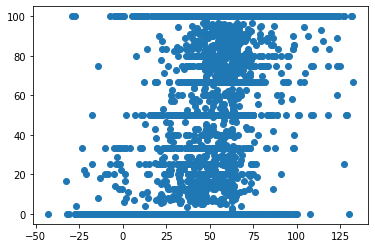

In [9]:
plt.scatter(predy, testy)

In [ ]:
#A classification model seems to be a better fit as we want the model to predict the data into a category. In this case, it would be a win, loss or a draw

In [ ]:
#The second attempt is to perform a Classification model

0.7463005883401675


0.0    2783
1.0    2765
2.0      61
Name: Name1_res, dtype: int64

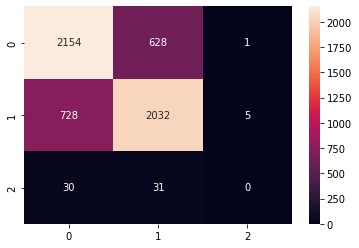

In [9]:

# CLassification 
# Where is counter intuitive so the value is set to all fields where the condition is false.
# So when we set the values of y to 1 it is for elements whose results are less than 50
testy.where(testy > 50, 0, inplace=True)  # 0 = loss
testy.where(testy <= 50, 1, inplace=True)  # 1 = Win

trainy.where(trainy > 50, 0, inplace=True)  # 0 = loss
trainy.where(trainy <= 50, 1, inplace=True)  # 1 = Win

train_draw = train_draw >= 50
test_draw = test_draw >= 50

testy[test_draw] = 2
trainy[train_draw] = 2


class_model = RandomForestClassifier(
        n_estimators = 100,
        criterion = 'gini'
    ).fit(trainx, trainy)


print(class_model.score(testx, testy))
pred = class_model.predict(testx)


cm = confusion_matrix(testy, pred)
hmap = sns.heatmap(cm, annot = True, fmt='g')

trainy.unique()
testy.value_counts()


In [11]:
#Export

pickle.dump(class_model, open('superheroe_model.sm', 'xb'))

In [ ]:
-do poly
-settings